<a href="https://colab.research.google.com/github/INIKA-N/Neural-Network/blob/main/TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


# building a model with tensorflow

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [5]:
predictions = model(x_train[:1]).numpy()
predictions
tf.nn.softmax(predictions).numpy()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test,  y_test, verbose=2)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3041 - accuracy: 0.9107
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1447 - accuracy: 0.9566
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1087 - accuracy: 0.9669
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0895 - accuracy: 0.9722
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0768 - accuracy: 0.9762
313/313 - 1s - loss: 0.0774 - accuracy: 0.9760 - 682ms/epoch - 2ms/step


[0.07741852849721909, 0.9760000109672546]

# building tensorflow model for dataset

Epoch 1/10
1875/1875 [==============================] - 77s 40ms/step - loss: 0.1507 - accuracy: 0.9531 - val_loss: 0.0428 - val_accuracy: 0.9864
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0370 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.0348 - accuracy: 0.9892 - val_loss: 0.0398 - val_accuracy: 0.9868
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0271 - val_accuracy: 0.9908
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0218 - accuracy: 0.9932 - val_loss: 0.0249 - val_accuracy: 0.9931
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0176 - accuracy: 0.9943 - val_loss: 0.0300 - val_accuracy: 0.9895
Epoch 7/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0145 - accuracy: 0.9951 - val_loss: 0.0309 -

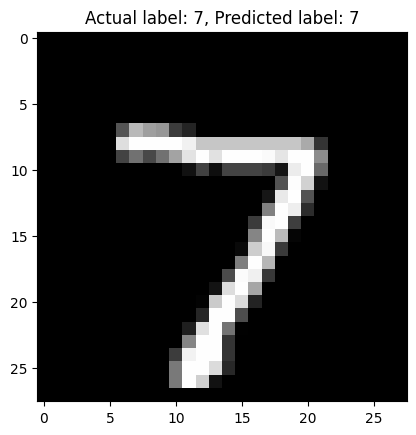

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Build a simple convolutional neural network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Expand dimensions to add a channel dimension for the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc}")

# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

# Example of plotting the first test image and its prediction
plt.figure()
plt.imshow(test_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Actual label: {test_labels[0]}, Predicted label: {tf.argmax(predictions[0])}")
plt.show()
